In [1]:
import matplotlib.pyplot as plt
import numpy as np
import data_manager as dm
from sklearn import linear_model
from sklearn.metrics import r2_score

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
df = dm.load_data()
df = df.drop(columns=["Unnamed: 0"])
df.head()

,porosity,characteristical_pore_length,sample_id,MEAN_pore_row_length,median_pore_row_length,MEAN_material_row_length,median_material_row_length,sum_medians,sum_MEANS
0,0.1,5.0,0.0,9.928164,9.0,83.995333,60.0,69.0,93.923497
1,0.1,10.0,0.0,20.229191,18.0,161.190752,112.0,130.0,181.419943
2,0.1,15.0,0.0,29.376095,26.0,212.962092,161.0,187.0,242.338186
3,0.1,20.0,0.0,39.770459,34.0,292.947779,230.0,264.0,332.718238
4,0.1,25.0,0.0,50.932816,44.0,335.646728,241.0,285.0,386.579544


# Смотрим, как у нас в принципе выгледят все колонки

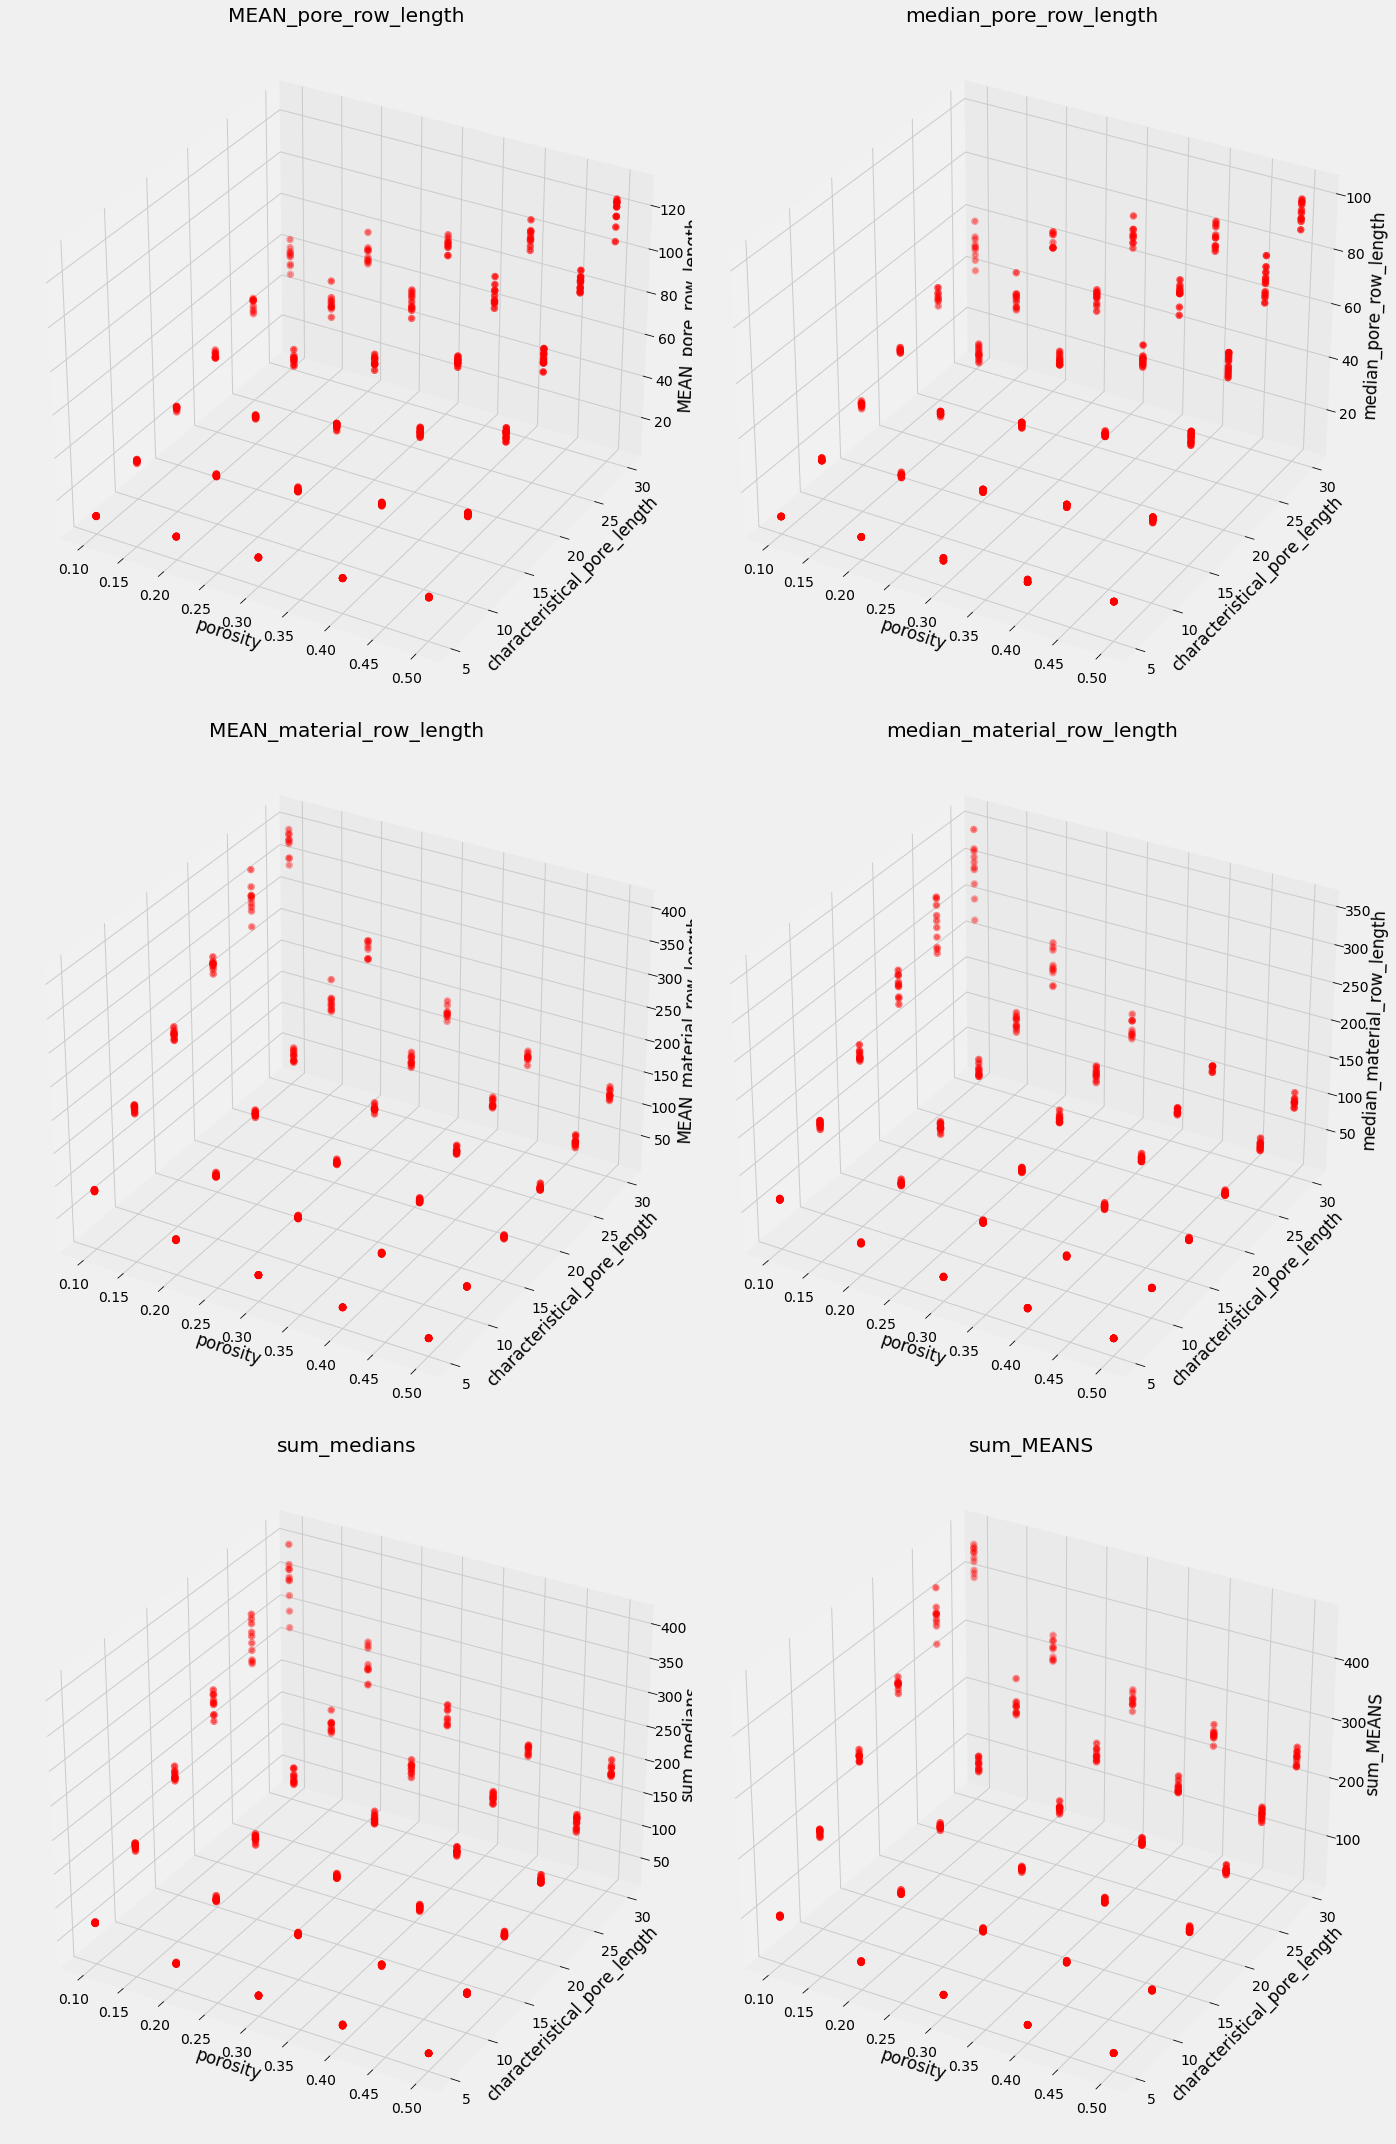

In [4]:
z_labels = df.columns[3:]
ncols = 2
nrows = len(z_labels) // 2
fig = plt.figure(figsize=(10*ncols, 10*nrows))

axes = [fig.add_subplot(int(f"{nrows}{ncols}{index+1}"), projection='3d') for index, _ in enumerate(z_labels)]

for z_label, ax in zip(z_labels, axes):
    x_label = "porosity"
    y_label = "characteristical_pore_length" 

    ax.scatter(df[[x_label]], df[[y_label]], df[[z_label]], color='red', linewidth=3)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    ax.set_title(z_label)
plt.tight_layout()

# Оставим только средние

In [5]:
df_mean = df.groupby(["porosity", "characteristical_pore_length"]).mean().reset_index()
df_mean

,porosity,characteristical_pore_length,sample_id,MEAN_pore_row_length,median_pore_row_length,MEAN_material_row_length,median_material_row_length,sum_medians,sum_MEANS
0,0.1,5.0,4.5,10.023158,9.0,85.175193,60.80,69.80,95.198350
1,0.1,10.0,4.5,19.768792,17.3,159.033216,116.20,133.50,178.802009
2,0.1,15.0,4.5,29.191040,25.6,222.176548,164.70,190.30,251.367588
3,0.1,20.0,4.5,39.068961,33.9,280.886932,215.90,249.80,319.955893
4,0.1,25.0,4.5,48.809482,42.8,335.314731,257.05,299.85,384.124213
5,0.1,30.0,4.5,57.517560,50.0,375.091775,293.85,343.85,432.609335
6,0.2,5.0,4.5,12.561765,11.0,49.030174,36.20,47.20,61.591939
7,0.2,10.0,4.5,24.763997,20.9,93.597666,69.50,90.40,118.361662
8,0.2,15.0,4.5,36.515419,31.3,136.378061,99.70,131.00,172.893480
9,0.2,20.0,4.5,48.255048,41.4,175.299256,131.90,173.30,223.554304


In [6]:
df_mean.shape

(30, 9)

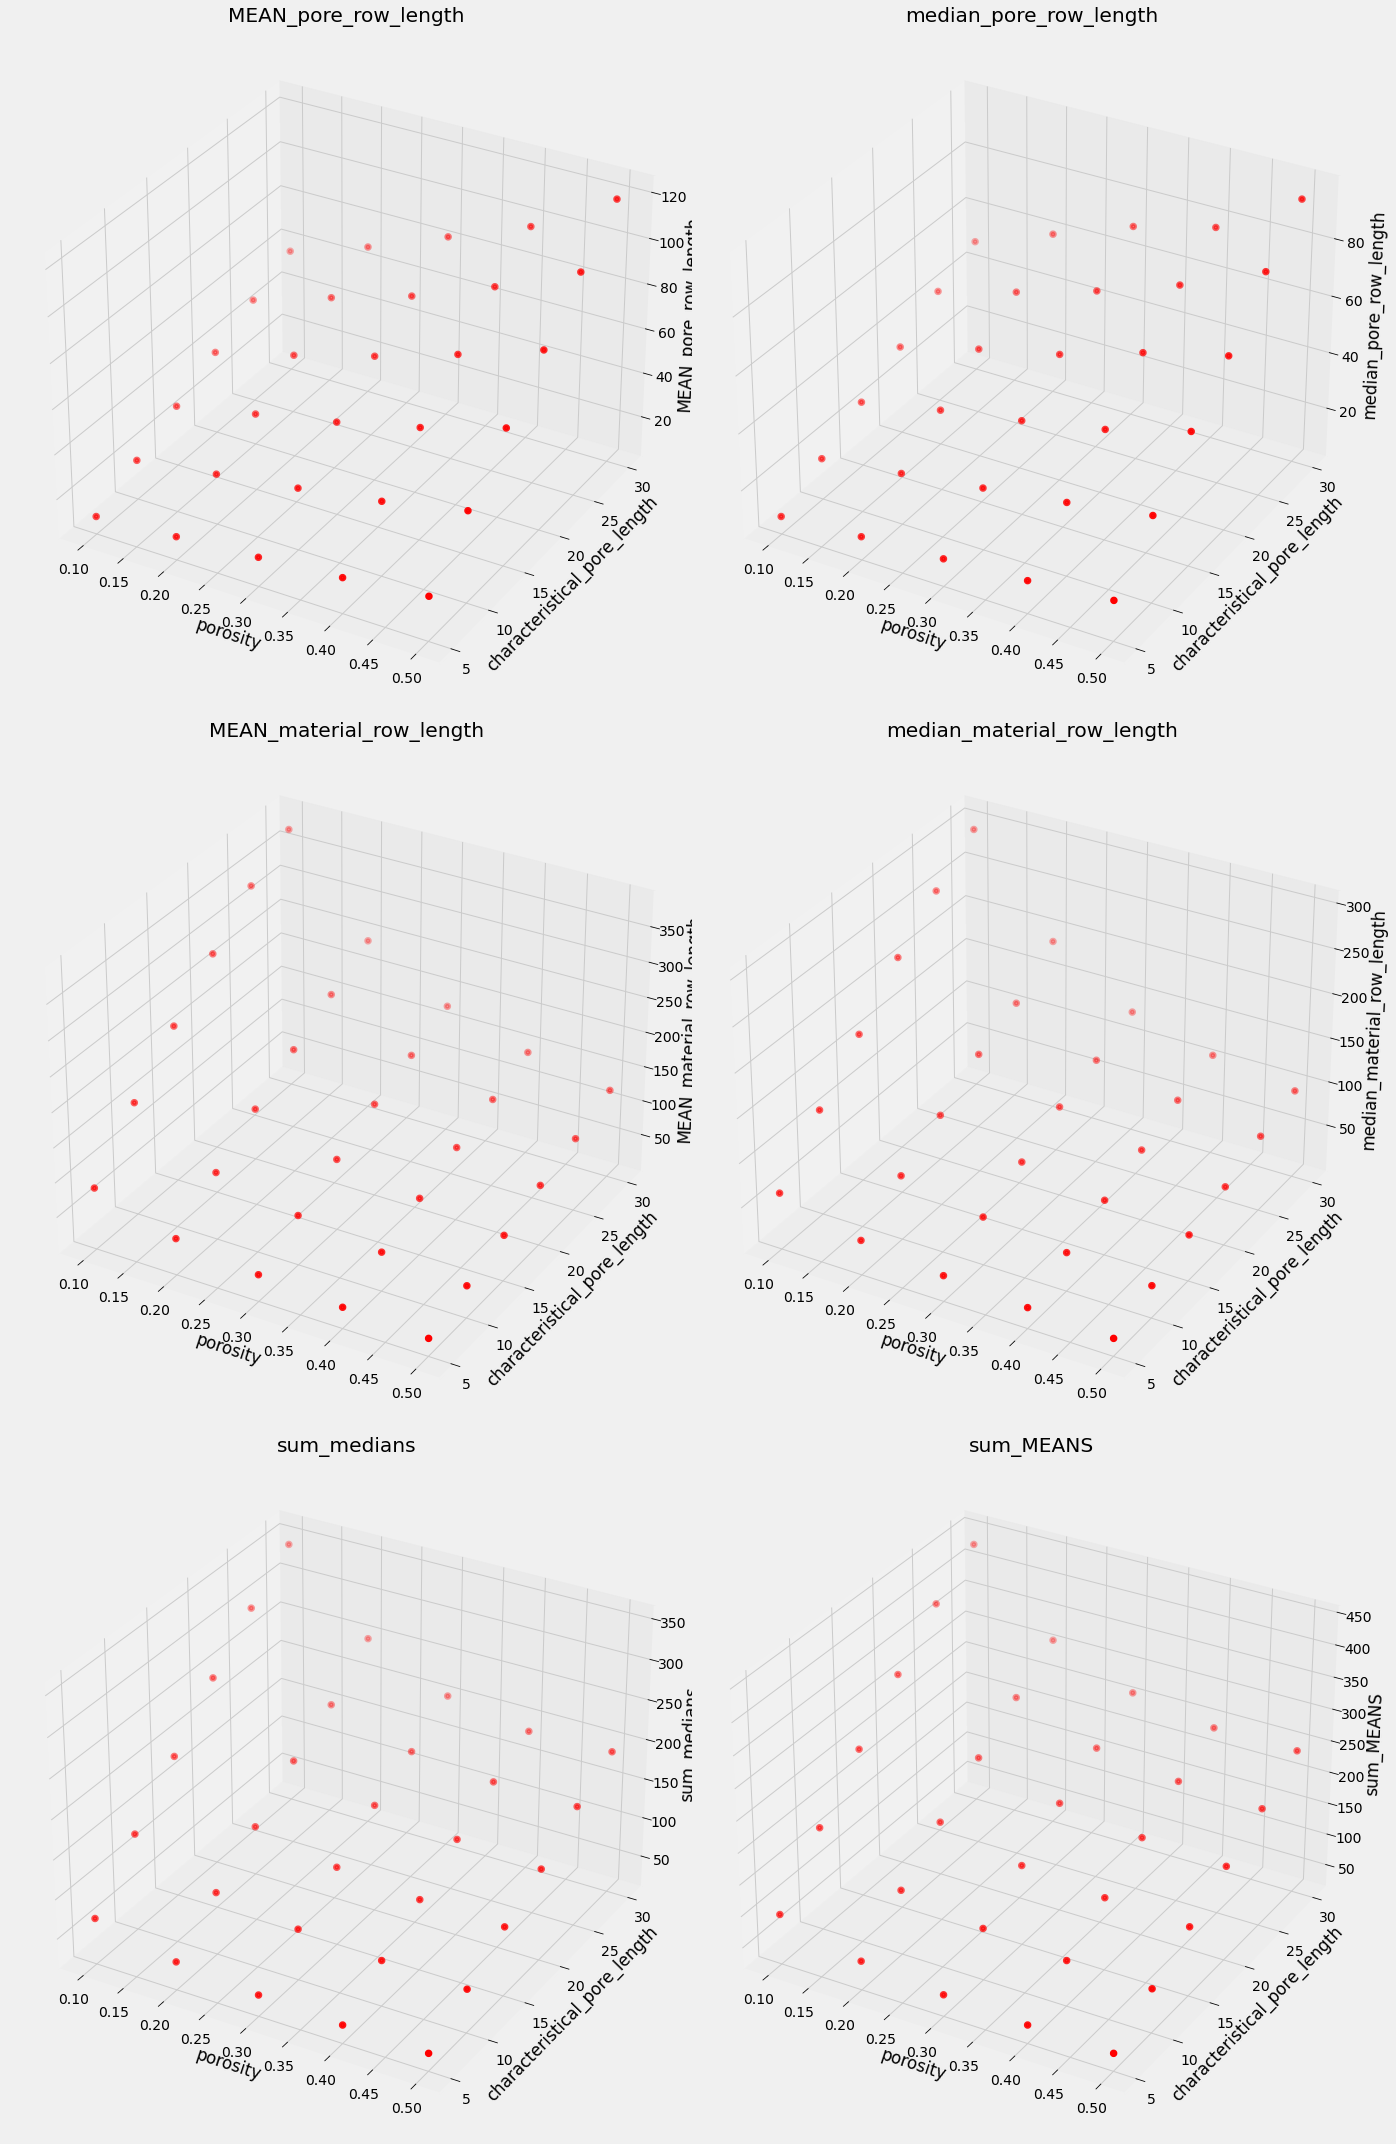

In [7]:
z_labels = df_mean.columns[3:]
ncols = 2
nrows = len(z_labels) // 2
fig = plt.figure(figsize=(10*ncols, 10*nrows))

axes = [fig.add_subplot(int(f"{nrows}{ncols}{index+1}"), projection='3d') for index, _ in enumerate(z_labels)]

for z_label, ax in zip(z_labels, axes):
    x_label = "porosity"
    y_label = "characteristical_pore_length" 

    ax.scatter(df_mean[[x_label]], df_mean[[y_label]], df_mean[[z_label]], color='red', linewidth=3)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    ax.set_title(z_label)
plt.tight_layout()

# Попробуем регрессию плоскостью:

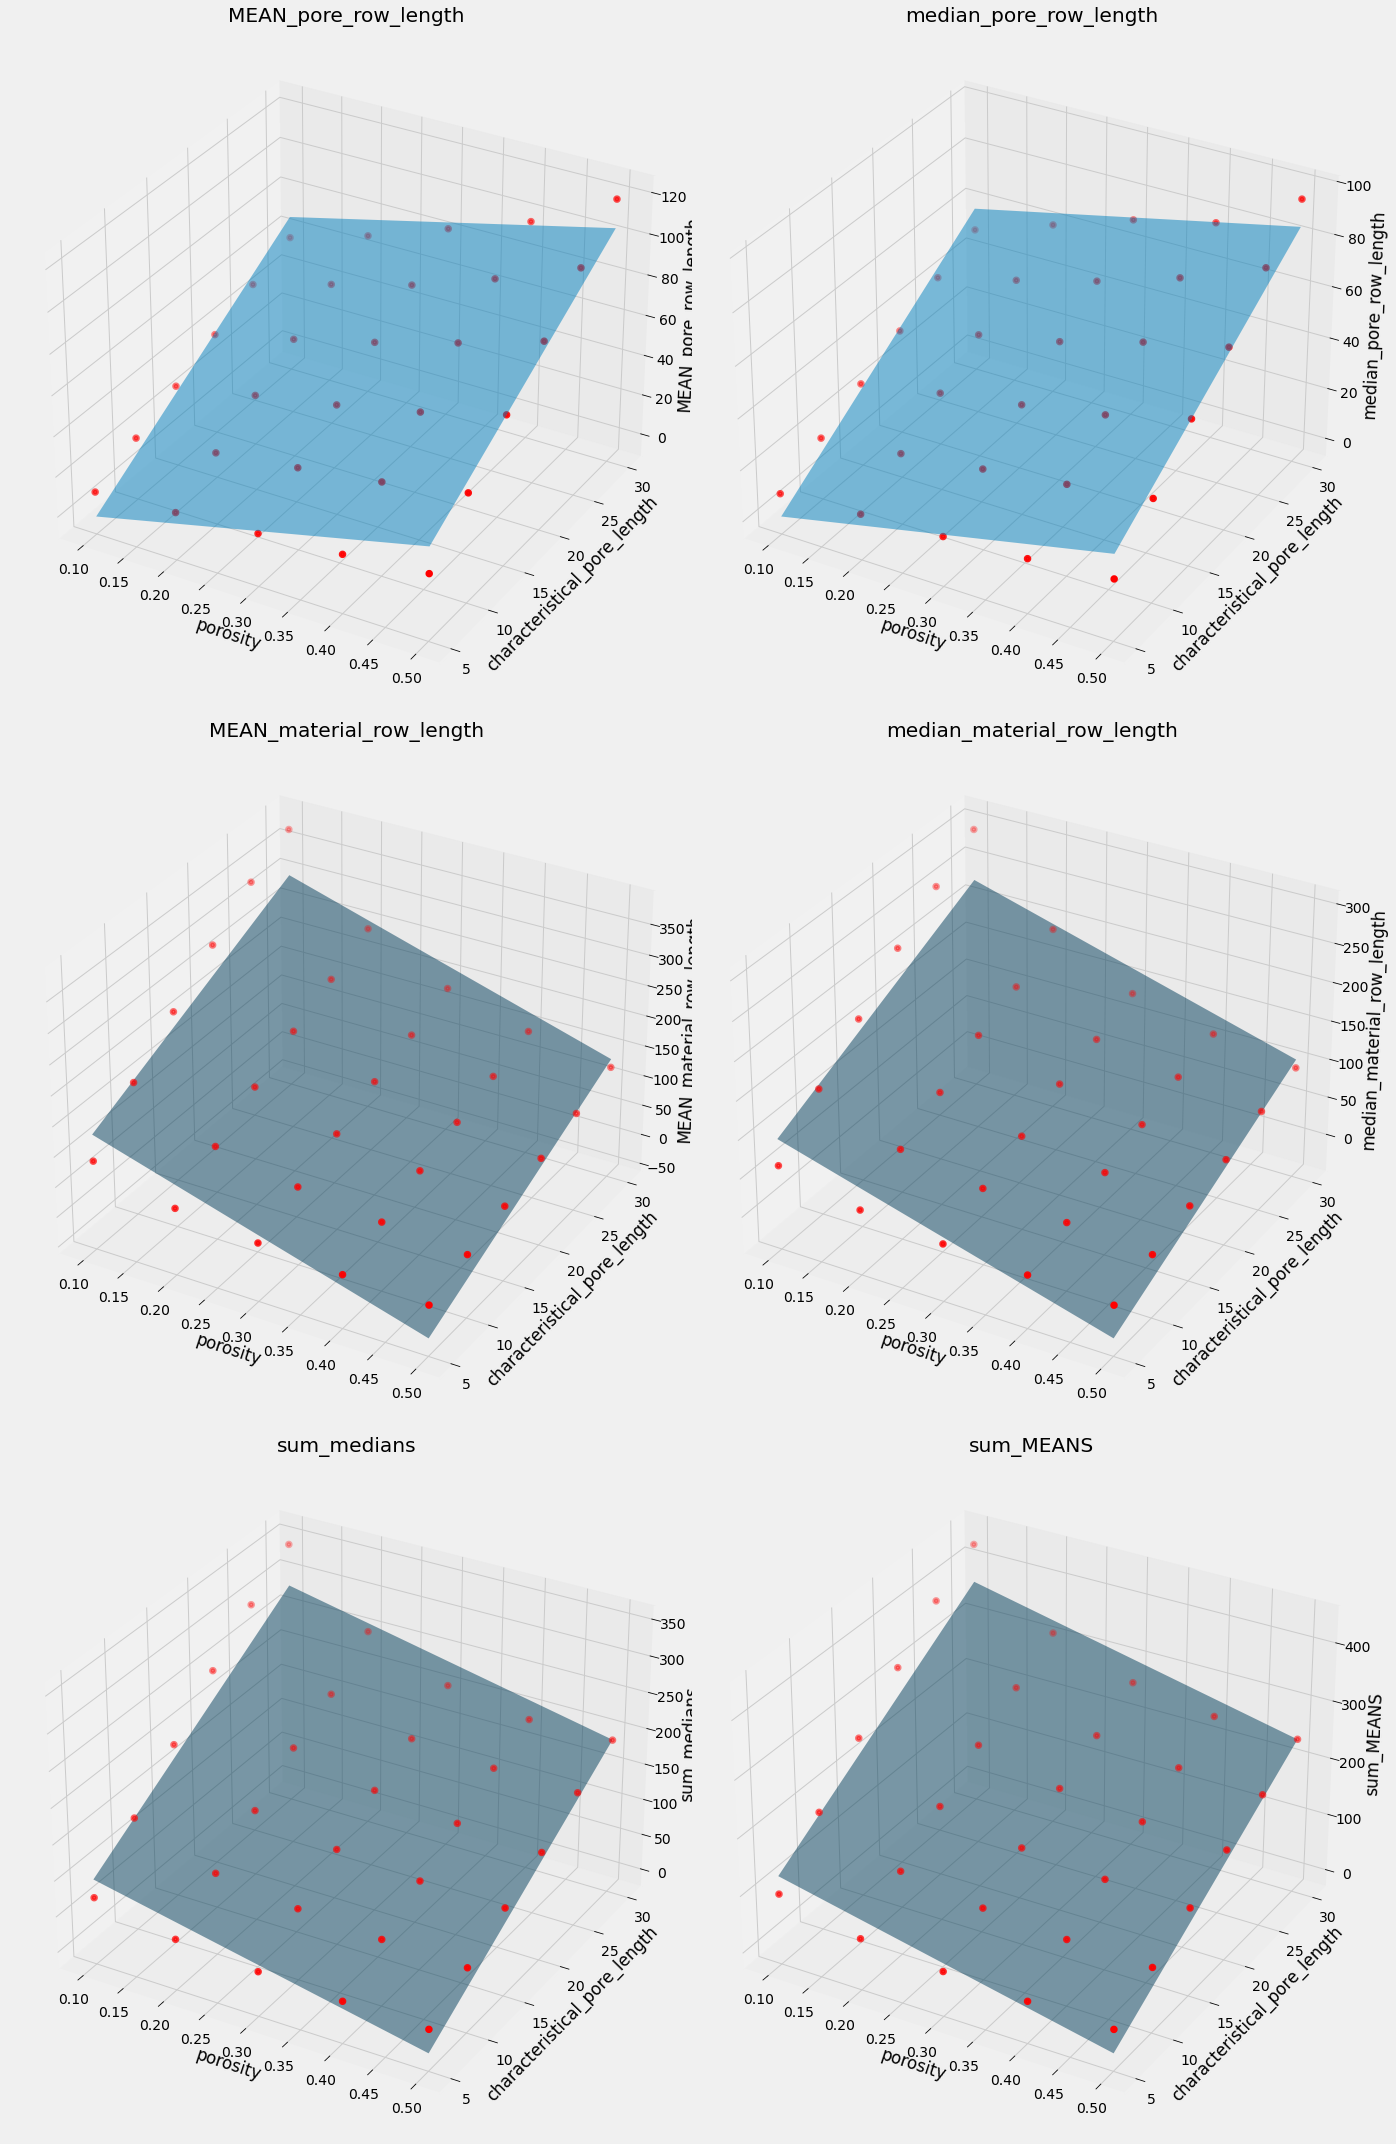

In [8]:
z_labels = df_mean.columns[3:]
ncols = 2
nrows = len(z_labels) // 2
fig = plt.figure(figsize=(10*ncols, 10*nrows))

axes = [fig.add_subplot(int(f"{nrows}{ncols}{index+1}"), projection='3d') for index, _ in enumerate(z_labels)]

for z_label, ax in zip(z_labels, axes):
    x_label = "porosity"
    y_label = "characteristical_pore_length"

    ax.scatter(df_mean[[x_label]], df_mean[[y_label]], df_mean[[z_label]], color='red', linewidth=3)

    X_train = np.transpose([df_mean[[x_label]].to_numpy(), df_mean[[y_label]].to_numpy()])[0]
    y_train = df_mean[[z_label]].to_numpy()
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)

    min_x, max_x = df_mean[[x_label]].min(), df_mean[[x_label]].max()
    min_y, max_y = df_mean[[y_label]].min(), df_mean[[y_label]].max()

    X, Y = np.meshgrid([min_x, max_x], [min_y, max_y])
    (X_coef, Y_coef), Z0 = regr.coef_[0], regr.intercept_
    ax.plot_surface(X, Y,
                    X_coef*X + Y_coef * Y + Z0,
                    alpha=.5)

    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    ax.set_title(z_label)
plt.tight_layout()

# Попробуем регрессию множеством прямых с разным наклоном

Рассмотрим только среднее по порам (MEAN_pore_row_length) т.к. там график максимально линеен.

Построим сечения 3d графика

In [9]:
df_mean = df_mean.drop(columns=['sample_id'])

In [10]:
df_mean_filtered = df_mean.filter(['porosity', 'characteristical_pore_length', 'MEAN_pore_row_length'])
df_mean_filtered.head()

,porosity,characteristical_pore_length,MEAN_pore_row_length
0,0.1,5.0,10.023158
1,0.1,10.0,19.768792
2,0.1,15.0,29.191040
3,0.1,20.0,39.068961
4,0.1,25.0,48.809482


In [11]:
df_mean_filtered.porosity.unique()

array([0.1, 0.2, 0.3, 0.4, 0.5])

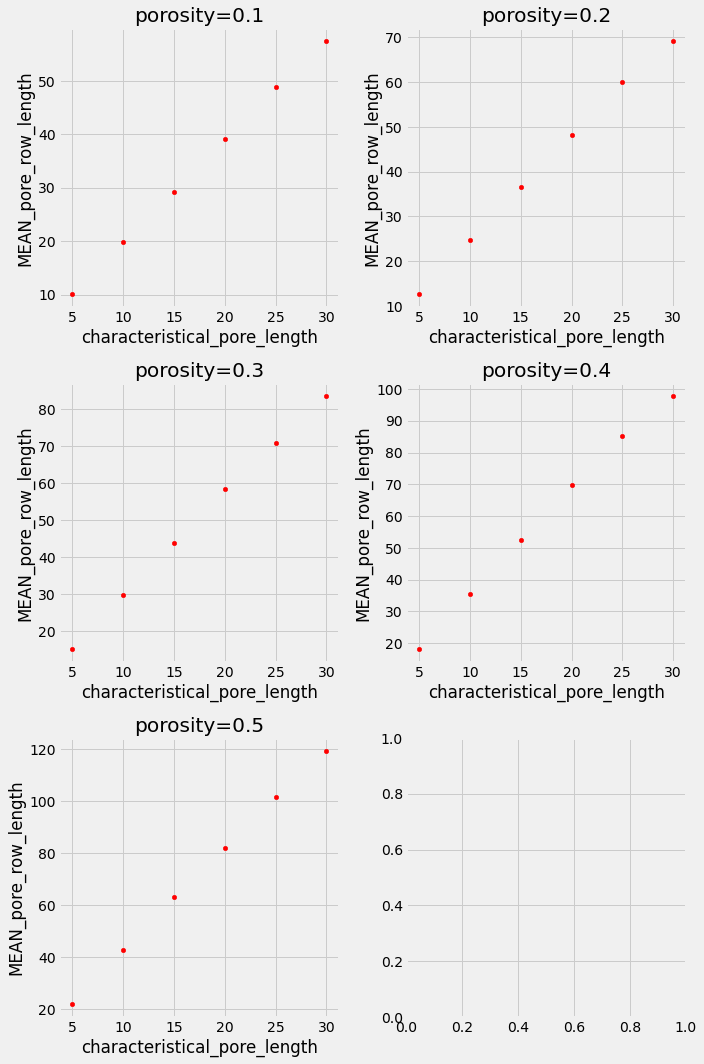

In [12]:
ncols = 2
nrows = np.ceil(df_mean_filtered.porosity.nunique() / ncols).astype(int)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows))
axes = axes.flatten()
porosities = df_mean_filtered.porosity.unique()

for ax, p in zip(axes, porosities):
    df_mean_filtered[df_mean_filtered.porosity==p].plot(kind='scatter',
                                                        x='characteristical_pore_length',
                                                        y='MEAN_pore_row_length',
                                                        color="red",
                                                        ax=ax)
    ax.set_title(f"porosity={p}")

plt.tight_layout()

Все вроде отлично, все ложится на прямую. Регрессируем!

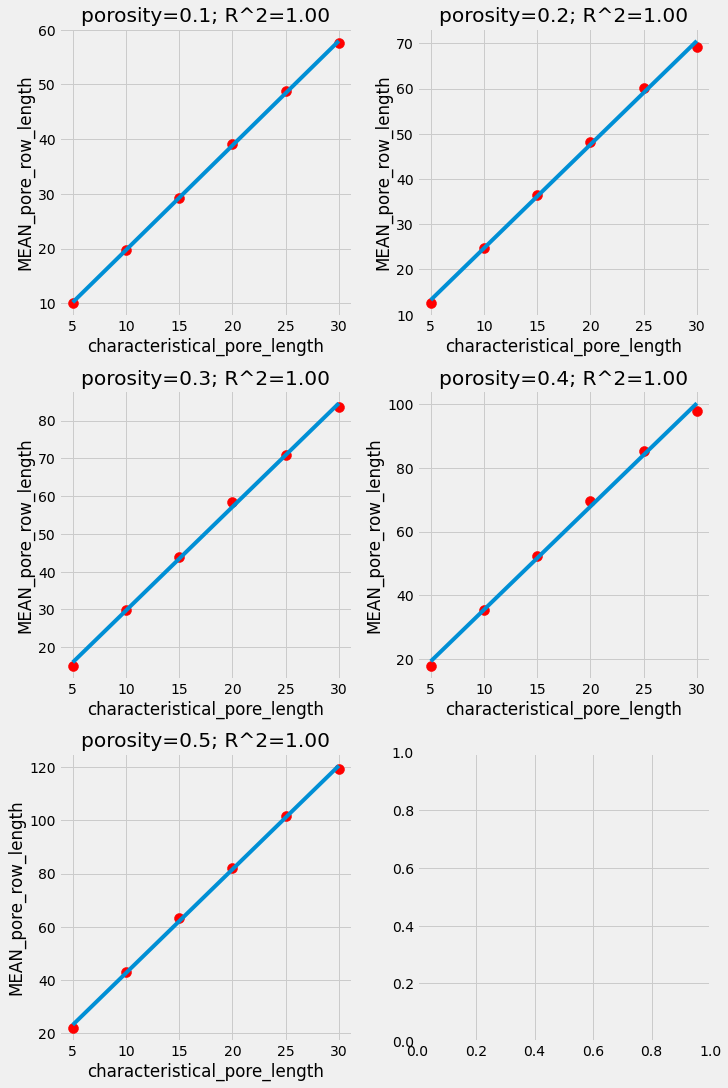

In [14]:
def get_linear_regression_func(x, y):
    x, y = np.asarray(x).reshape(-1, 1), np.asarray(y).reshape(-1, 1)
    x_edge_values = np.asarray([x[0], x[-1]])
    regr = linear_model.LinearRegression()
    regr.fit(x, y)
    k, y0 = regr.coef_, regr.intercept_ #y = y0+kx

    r2 = r2_score(y, regr.predict(x))
    return float(y0), float(k[0]), x_edge_values, y0 + k[0]*x_edge_values, r2


ncols = 2
nrows = np.ceil(df_mean_filtered.porosity.nunique() / ncols).astype(int)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 5*nrows), constrained_layout=True)
axes = axes.flatten()
porosities = df_mean_filtered.porosity.unique()

k_p_values, y0_p_values = [], []

for ax, p in zip(axes, porosities):
    cpl = df_mean_filtered[df_mean_filtered.porosity==p].characteristical_pore_length.to_numpy()
    Mprl = df_mean_filtered[df_mean_filtered.porosity==p].MEAN_pore_row_length.to_numpy()
    
    k_p, y0_p, x_values, y_values, r2 = get_linear_regression_func(cpl, Mprl)

    x_values = np.asarray([cpl[0], cpl[-1]])
    ax.plot(x_values, y_values)
    ax.scatter(x=cpl, y=Mprl, color="red", s=100)
    ax.set_title(f"porosity={p}; R^2={r2:.2f}")

    ax.set_xlabel('characteristical_pore_length')
    ax.set_ylabel("MEAN_pore_row_length")

    k_p_values.append(k_p), y0_p_values.append(y0_p)


Теперь для каждой прямой с спрошлого графика возьмем тангенс наклона и интерсепт. Посмотрим, как они зависят от пористости 

Text(0.5, 1.0, 'R^2=0.99')

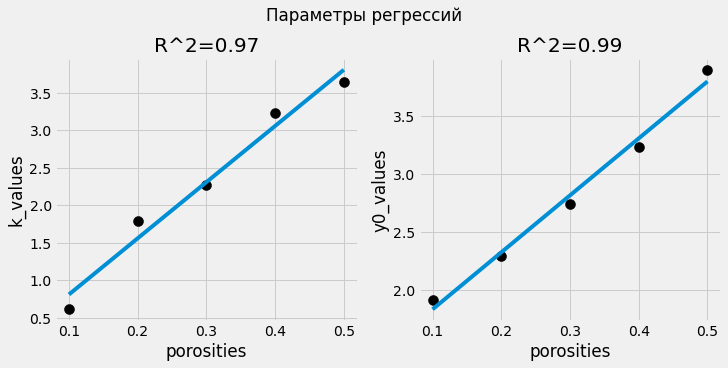

In [16]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5*2, 5), constrained_layout=True)
fig.suptitle("Параметры регрессий")

axes[0].scatter(x=porosities, y=k_p_values, color="black", s=100)
Y0_k, K0_k, x_values, y_values, r2 = get_linear_regression_func(porosities, k_p_values)
axes[0].plot(x_values, y_values)
axes[0].set_xlabel('porosities')
axes[0].set_ylabel("k_values")
axes[0].set_title(f"R^2={r2:.2f}")

axes[1].scatter(x=porosities, y=y0_p_values, color="black", s=100)
Y0_y0, K0_y0, x_values, y_values, r2 = get_linear_regression_func(porosities, y0_p_values)
axes[1].plot(x_values, y_values)
axes[1].set_xlabel('porosities')
axes[1].set_ylabel("y0_values")
axes[1].set_title(f"R^2={r2:.2f}")

Вроде все отлично сошлось, значения R^2 большие. Теперь мы знаем инфу о том как:

- меняется MEAN_pore_row_length при фиксированной пористости p, через уравнение y= y0_p + k_p * characteristical_pore_length
- как k_p и y0_p зависят от пористоти p: по уравнениям k_p = Y0_k + K0_k \* p и y0_p = Y0_y0 + K0_y0 * p

{Y0_k, K0_k, Y0_y0, K0_y0} - то, что мы искали

Теперь, зная пористость и {Y0_k, K0_k, Y0_y0, K0_y0}, можно найти y0_p и k_p. Отсюда, легким движением руки найти characteristical_pore_length

# Решаем обратную задачу

In [17]:
def get_characteristical_pore_length(porosity, MEAN_pore_row_length):
    params = [Y0_k, K0_k, Y0_y0, K0_y0]
    
    k_p = Y0_k + K0_k * porosity
    y0_p = Y0_y0 + K0_y0 * p

    characteristical_pore_length = (MEAN_pore_row_length - y0_p) / k_p
    return characteristical_pore_length



In [40]:
len(df_mean_filtered)

30

In [56]:
devs = []
for indx in range(len(df_mean_filtered)):
    porosity, characteristical_pore_length, MEAN_pore_row_length = df_mean_filtered.to_numpy()[indx]
    cpl_predicted = get_characteristical_pore_length(porosity, MEAN_pore_row_length)
    dev = abs(characteristical_pore_length - cpl_predicted) / characteristical_pore_length
    print(f'porosity: {porosity} cpl: {characteristical_pore_length:.3f} cpl_pred: {cpl_predicted:.3f} dev: {dev}')
    devs.append(dev)
print('=========================================================')
print(f'MAPE={np.mean(devs):.2f}')

porosity: 0.1 cpl: 5.000 cpl_pred: 7.652 dev: 0.5304878023782761
porosity: 0.1 cpl: 10.000 cpl_pred: 19.629 dev: 0.9629029412151116
porosity: 0.1 cpl: 15.000 cpl_pred: 31.208 dev: 1.0805469055010788
porosity: 0.1 cpl: 20.000 cpl_pred: 43.347 dev: 1.1673681622212713
porosity: 0.1 cpl: 25.000 cpl_pred: 55.318 dev: 1.2127068013972226
porosity: 0.1 cpl: 30.000 cpl_pred: 66.019 dev: 1.2006395816377813
porosity: 0.2 cpl: 5.000 cpl_pred: 5.612 dev: 0.12235178476298998
porosity: 0.2 cpl: 10.000 cpl_pred: 13.424 dev: 0.34236776419290055
porosity: 0.2 cpl: 15.000 cpl_pred: 20.947 dev: 0.3964657709416154
porosity: 0.2 cpl: 20.000 cpl_pred: 28.463 dev: 0.42313727702158915
porosity: 0.2 cpl: 25.000 cpl_pred: 36.009 dev: 0.4403528372306843
porosity: 0.2 cpl: 30.000 cpl_pred: 41.906 dev: 0.39685294894208456
porosity: 0.3 cpl: 5.000 cpl_pred: 4.908 dev: 0.018446647073194634
porosity: 0.3 cpl: 10.000 cpl_pred: 11.277 dev: 0.12770776917556378
porosity: 0.3 cpl: 15.000 cpl_pred: 17.319 dev: 0.15459357401

In [48]:
porosity, characteristical_pore_length, MEAN_pore_row_length

(0.3, 20.0, 58.32825285042526)

In [49]:
get_characteristical_pore_length(porosity, MEAN_pore_row_length)

23.604093158692706

In [57]:
import phantom_generator as pg

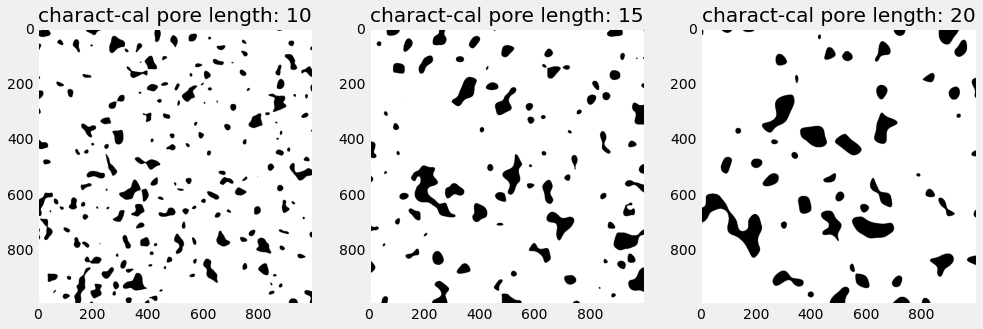

In [61]:
characteristical_lengths = [10, 15, 20]
porosity = 0.1
shape = [1000, 1000]

phantoms = [pg.gen_phantom(shape, porosity, cl) for cl in characteristical_lengths]

fig, axes = plt.subplots(ncols=3, figsize=(15,5))

for ax, cl, phantom in zip(axes, characteristical_lengths, phantoms):
    ax.imshow(phantom, cmap='gray')
    ax.set_title(f"charact-cal pore length: {cl}")
    ax.grid(color='red')